In [1]:
%matplotlib inline

import datetime as dt
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import peakutils
import pylab

from matplotlib import pyplot

### Milestones

- 2018-07-09: President Donald Trump nominated Judge Brett Kavanaugh to become an Associate Justice of the Supreme Court of the United States on July 9, 2018.
- 2018-09-04: The Senate Judiciary Committee began Kavanaugh's confirmation hearing on September 4.
- 2018-09-24: [Gogle News](https://www.google.com/search?q=Kavanaugh&biw=1366&bih=604&source=lnt&tbs=cdr%3A1%2Ccd_min%3A7%2F24%2F2018%2Ccd_max%3A7%2F24%2F2018&tbm=nws)
- 2018-09-27: Both Kavanaugh and Blasey Ford were questioned by members of the Judiciary Committee and Arizona-based sex crimes prosecutor Rachel Mitchell on September 27
- 2018-10-06: On October 6, the Senate voted 50–48 to confirm Kavanaugh's nomination to the Supreme Court.

In [2]:
df = pd.read_csv('grouped_date.csv')
df.head()

,date,count
0,2018-09-28,159
1,2018-08-14,1
2,2018-08-21,2
3,2018-06-26,1
4,2018-10-03,61


In [3]:
print('first date: {} & last date: {}'.format(df.date.min(),df.date.max()))

first date: 2018-06-10 & last date: 2018-11-06


In [4]:
dates = np.sort(df.date)
idx = pd.date_range(dates[0], dates[-1])
df.set_index('date', inplace=True)
df.index = pd.DatetimeIndex(df.index)
df = df.reindex(idx, fill_value=None)

In [5]:
df = df.reset_index()
df = df.rename({'index':'date'}, axis='columns')
df = df.fillna(0)
df.head()

,date,count
0,2018-06-10,1.0
1,2018-06-11,0.0
2,2018-06-12,0.0
3,2018-06-13,0.0
4,2018-06-14,0.0


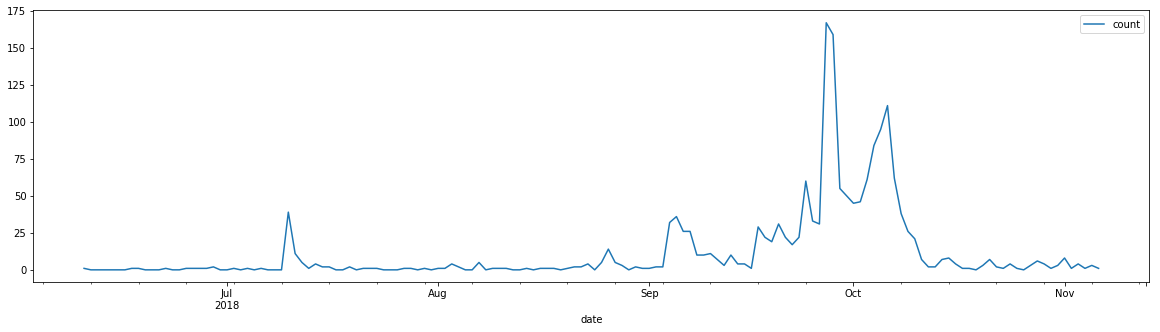

In [6]:
df.plot(x='date', y='count', figsize=(20,5))

## Peak detection

In [7]:
indexes = peakutils.indexes(df['count'].values, thres=0.2, min_dist=0)
indexes

array([ 30,  87, 106, 109, 118])

In [8]:
df['peak'] = None

df['peak']  = df.apply(lambda x: x['count'] if x.name in indexes else None, axis=1)
df = df.fillna(0)
df.loc[df['peak'] > 0]

,date,count,peak
30,2018-07-10,39.0,39.0
87,2018-09-05,36.0,36.0
106,2018-09-24,60.0,60.0
109,2018-09-27,167.0,167.0
118,2018-10-06,111.0,111.0


In [9]:
xticks_labels = []
is_in_xticks = []

for d in df['date']:
    month = d.strftime("%B")
    if month in is_in_xticks:
        xticks_labels.append('')
    else:
        xticks_labels.append(month)
        is_in_xticks.append(month)

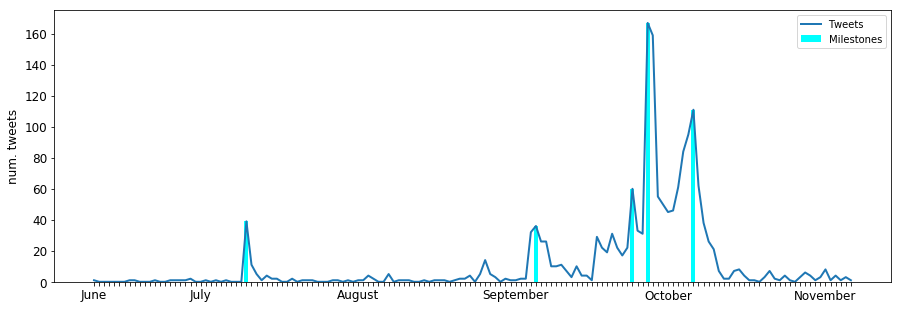

In [10]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

ax_1 = pylab.plot(np.arange(1, len(df)+1), df['count'], lw=2)
ax_2 = pylab.bar(np.arange(1, len(df)+1), df['peak'], color="cyan")

_ = pylab.xticks(list(np.arange(1, len(df)+1)),  # xticks
                 xticks_labels,                  # labels
                 rotation=0,                     # rotation
                 size=12)                        # size xticks

_ = pylab.legend([ax_1[0], ax_2], ['Tweets', 'Milestones'])

_ = pylab.ylabel('num. tweets', size=12)
_ = pylab.yticks(size=12)

In [11]:
df.loc[df['peak'] > 0]['count'].sum()

413.0

In [12]:
df['interest'] = ((df['peak']/df.loc[df['peak'] > 0]['peak'].max())* 10).round(0)